Silakan unggah file gambar Anda (misalnya, 'test.jpg'):


Saving A-blurry-and-scratched-black-and-white-old-photo.webp to A-blurry-and-scratched-black-and-white-old-photo.webp
File 'A-blurry-and-scratched-black-and-white-old-photo.webp' berhasil diunggah.

--- HASIL HARRIS CORNER DETECTION (Sudut Merah) ---


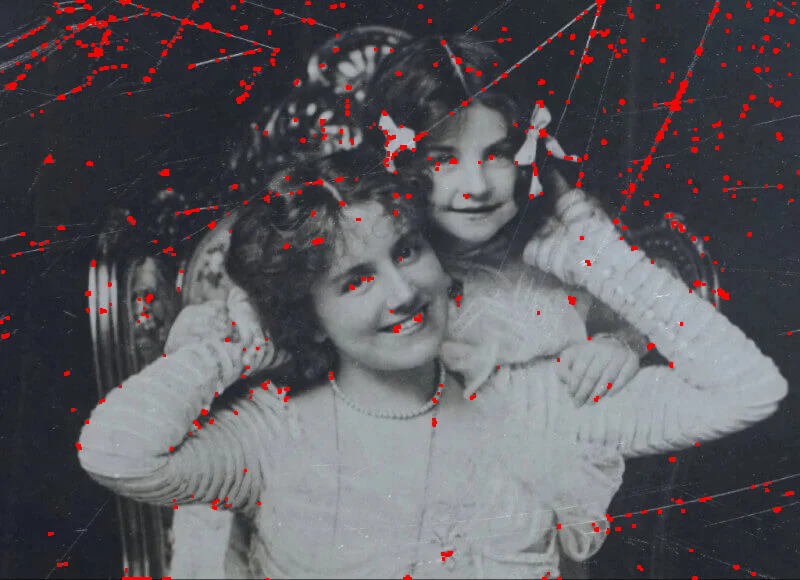


--- HASIL FAST CORNER DETECTION (Titik Hijau) ---


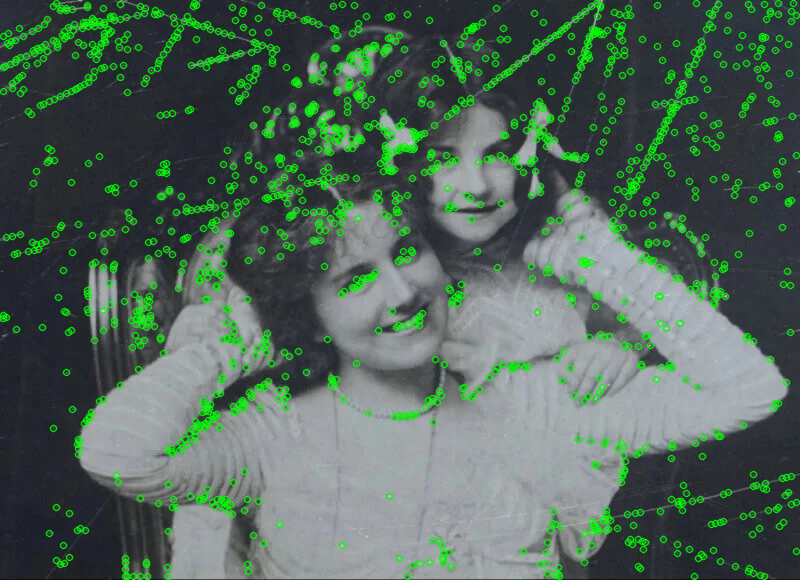

In [2]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow # Digunakan untuk menampilkan gambar di Colab
import io

# --- 1. PROSES UPLOAD FILE GAMBAR DI GOOGLE COLAB ---

print("Silakan unggah file gambar Anda (misalnya, 'test.jpg'):")
uploaded = files.upload()

# Mengambil nama file yang diunggah
if not uploaded:
    print("Tidak ada file yang diunggah. Program dihentikan.")
else:
    filename = next(iter(uploaded))
    print(f"File '{filename}' berhasil diunggah.")

    # Membaca gambar dari memori
    nparr = np.frombuffer(uploaded[filename], np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

    if img is None:
        print("Error: File tidak dapat dibaca sebagai gambar.")
    else:
        # Mengubah ke Grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # --- 2. HARRIS CORNER DETECTION ---

        gray_float = np.float32(gray)
        dst = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)
        dst = cv2.dilate(dst, None)

        # Membuat gambar hasil deteksi Harris dan menandai sudut (Merah)
        img_harris = img.copy()
        # Menandai sudut dengan warna merah (B,G,R) = (0, 0, 255)
        img_harris[dst > 0.01 * dst.max()] = [0, 0, 255]

        # --- 3. FAST CORNER DETECTION ---

        # Membuat objek FAST Detector (threshold 20)
        fast = cv2.FastFeatureDetector_create(threshold=20)

        # Deteksi keypoints menggunakan FAST
        keypoints = fast.detect(gray, None)

        # Membuat gambar hasil deteksi FAST dan menandai sudut (Hijau)
        img_fast = img.copy()
        img_fast = cv2.drawKeypoints(img_fast, keypoints, None, color=(0, 255, 0), flags=0)

        # --- 4. MENAMPILKAN HASIL DI COLAB ---

        print("\n--- HASIL HARRIS CORNER DETECTION (Sudut Merah) ---")
        # Menampilkan gambar hasil Harris
        cv2_imshow(img_harris)

        print("\n--- HASIL FAST CORNER DETECTION (Titik Hijau) ---")
        # Menampilkan gambar hasil FAST
        cv2_imshow(img_fast)